# Getting and Visualizing the Data

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
data = pd.read_csv('New_Data.csv')

X = data.iloc[:,:4]
Y = data['Name']
final_performances = []
final_algs = []

In [2]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
97     5
98     5
99     5
100    5
101    5
Name: Name, Length: 102, dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
Cheek diff    102 non-null float64
Eye diff      102 non-null float64
Mouth diff    102 non-null float64
Nose diff     102 non-null float64
Name          102 non-null int64
dtypes: float64(4), int64(1)
memory usage: 4.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1176e5e10>,
      dtype=object)

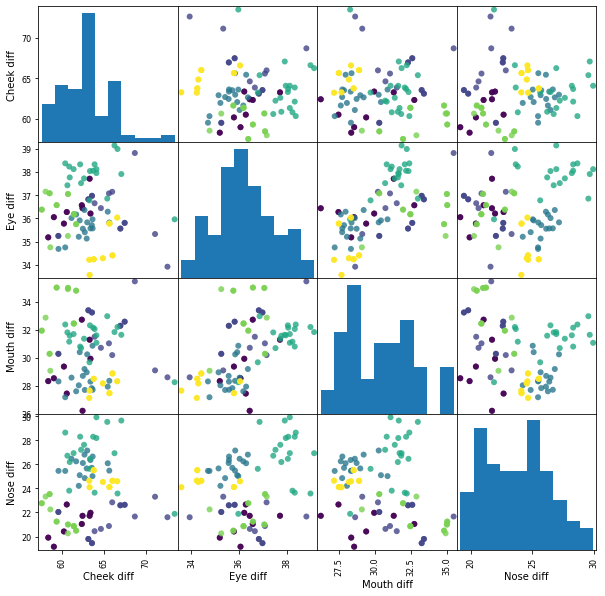

In [4]:

%matplotlib inline
from pandas.plotting import scatter_matrix

features = ["Cheek diff", "Eye diff", "Mouth diff", "Nose diff"]
dataFrame = pd.DataFrame(X, columns=features)
 #Gets us the first 5 feature names. 
scatter_matrix(X, figsize = (10, 10), c = Y, alpha = 0.8, marker = 'O')

In [5]:
X.shape

(102, 4)

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2)
#Split the data into training and testing sets.

scaler = MinMaxScaler() #Scaling the data because sometimes, the data varies a lot(check X.describe())
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

In [8]:
X_train_org  #Original without scaling. (Values vary a lot)

,Cheek diff,Eye diff,Mouth diff,Nose diff
62,60.615265,37.423466,31.825390,26.722607
3,62.343075,36.565900,32.740740,21.042845
79,57.999382,37.151493,32.886536,23.324019
45,65.637634,35.823490,28.350840,25.481482
48,63.625416,35.961346,30.868720,25.025632
...,...,...,...,...
98,66.587940,36.034954,28.316500,24.596397
67,67.080580,37.905933,31.653238,29.646679
64,61.358250,38.117130,31.708256,26.936821
47,61.664795,36.169580,27.598944,26.254624


In [9]:
X_train

array([[0.20389115, 0.71184098, 0.6055244 , 0.72134174],
       [0.31855171, 0.55328295, 0.70404571, 0.1800717 ],
       [0.03029648, 0.66155505, 0.71973808, 0.39746305],
       [0.53718453, 0.41601647, 0.2315503 , 0.60306499],
       [0.40365015, 0.4415051 , 0.50255573, 0.55962339],
       [0.1988598 , 0.4993574 , 0.13310542, 0.33450699],
       [0.41308527, 0.12409617, 0.24738087, 0.60626596],
       [0.06231365, 0.64825883, 0.44034787, 0.4167527 ],
       [0.        , 0.51856521, 0.6192188 , 0.34449203],
       [0.18676855, 0.88595258, 0.66663011, 0.90477184],
       [0.48605981, 0.13235239, 0.21173669, 0.51318353],
       [0.37796555, 0.12025225, 0.09969105, 0.52364877],
       [0.06802322, 0.21904913, 0.30936722, 0.29532626],
       [0.21827341, 0.86048097, 0.5339451 , 0.4441282 ],
       [0.65950497, 0.41310071, 0.68854385, 0.33209281],
       [0.74043018, 0.96828788, 1.        , 0.23922623],
       [0.3794123 , 0.59214748, 0.37470051, 0.61727841],
       [0.25493909, 0.48197431,

In [10]:
dataFrame = pd.DataFrame(X_train, columns = ["Cheek diff", "Eye diff", "Mouth diff", "Nose diff"])
dataFrame

,Cheek diff,Eye diff,Mouth diff,Nose diff
0,0.203891,0.711841,0.605524,0.721342
1,0.318552,0.553283,0.704046,0.180072
2,0.030296,0.661555,0.719738,0.397463
3,0.537185,0.416016,0.231550,0.603065
4,0.403650,0.441505,0.502556,0.559623
...,...,...,...,...
76,0.600249,0.455115,0.227854,0.518718
77,0.632941,0.801046,0.586995,1.000000
78,0.253197,0.840095,0.592917,0.741756
79,0.273540,0.480006,0.150622,0.676744


# Print out the correlation coefficients

In [11]:
import numpy as np
columns = X
target = Y
corr_list = []; #Correlation list- Which features have the biggest role in the accuracy of the model. Higher -> More important.
for i in range(0,4):
    corr_list.append(np.corrcoef(X_train[:,i], y_train)[0,1])#Get all the rows and the ith column.
print(corr_list)

[-0.02985305124165702, -0.24061959615220552, 0.009842332530161648, 0.32880219482574313]


# KNN Classifier

### Training KNN for different k's

In [12]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range (1, 30):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
    print("%d: Training Accuracy: %f" % (k, knn.score(X_train, y_train))) #Accuracy of the model when training.
    print("%d: Testing Accuracy: %f" % (k, knn.score(X_test, y_test)))#Accuracy of the test.

1: Training Accuracy: 1.000000
1: Testing Accuracy: 0.904762
2: Training Accuracy: 0.925926
2: Testing Accuracy: 0.809524
3: Training Accuracy: 0.913580
3: Testing Accuracy: 0.809524
4: Training Accuracy: 0.913580
4: Testing Accuracy: 0.761905
5: Training Accuracy: 0.876543
5: Testing Accuracy: 0.857143
6: Training Accuracy: 0.839506
6: Testing Accuracy: 0.857143
7: Training Accuracy: 0.839506
7: Testing Accuracy: 0.857143
8: Training Accuracy: 0.839506
8: Testing Accuracy: 0.857143
9: Training Accuracy: 0.827160
9: Testing Accuracy: 0.857143
10: Training Accuracy: 0.827160
10: Testing Accuracy: 0.857143
11: Training Accuracy: 0.839506
11: Testing Accuracy: 0.761905
12: Training Accuracy: 0.851852
12: Testing Accuracy: 0.761905
13: Training Accuracy: 0.864198
13: Testing Accuracy: 0.761905
14: Training Accuracy: 0.864198
14: Testing Accuracy: 0.761905
15: Training Accuracy: 0.864198
15: Testing Accuracy: 0.761905
16: Training Accuracy: 0.814815
16: Testing Accuracy: 0.714286
17: Traini

### Determining Optimal k Value Through Code

In [13]:
k_diff_value = 1
min_diff = 100
k_average_value = 10
max_average = 0
d = zip(train_score_array, test_score_array)
#What the code below does is find the k-value where the difference between test and training scores is as small as possible.
#This k-value is the "optimal" k-value.
for i, element in enumerate(d):
    both = element
    difference = abs(both[0] - both[1])
    average = (both[0] + both[1])/2
    #print(value)
    if(average > max_average):
        max_average = average
        k_average_value = i + 1
    
    if(difference < min_diff):
        min_diff = difference
        k_diff_value = i + 1


print("The optimal k should be:",k_diff_value, "based on the minimum distance between training and testing set accuracies")
print("The k value with the highest average accuracy was:",k_average_value)

The optimal k should be: 27 based on the minimum distance between training and testing set accuracies
The k value with the highest average accuracy was: 1


### Determining Optimal k Value through Graph

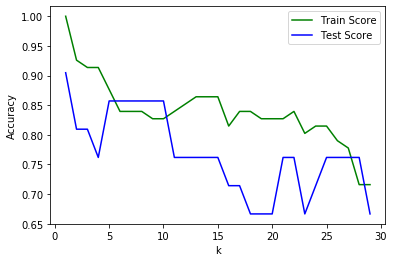

In [14]:
import matplotlib.pyplot as plt
x_axis = range(1,30) # x_axis values
%matplotlib inline
#x-values, y-values, Name for legend, color
plt.plot(x_axis, train_score_array , label = "Train Score", c= "g") #Plots a green line
plt.plot(x_axis, test_score_array, label = "Test Score", c= "b")  #Plots a blue line
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

## Grid Search Algorithm for best k

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [16]:
vals = range(1,40)
param_grid = {'n_neighbors': vals}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': range(1, 40)}


In [17]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 15, return_train_score = True)
grid_search.fit(X_train, y_train)

/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 12 members, which is too few. The minimum number of members in any class cannot be less than n_splits=15.
  % (min_groups, self.n_splits)), Warning)
/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [18]:
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Best score: 0.8765
Best parameters: {'n_neighbors': 1}


### Accuracy

In [19]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
print("Training Accuracy:",knn.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", knn.score(X_test, y_test) )#Accuracy of the test.
final_performances.append(knn.score(X_test,y_test))
final_algs.append("KNN")

Training Accuracy: 1.0
Testing Accuracy: 0.9047619047619048


### Predicting Custom Inputs

In [20]:
new_x = [[0.470437,0.530412,0.486742,0.141006], [0.273302,0.402896,0.928058,0.127295] ]
y = knn.predict(new_x)
print(y)

[1 4]


###  Expected Outputs vs Predicted Outputs

In [21]:
predictions = knn.predict(X_test) #Make predictions for the testing data
values = []

for i in zip(y_test, predictions):
    values.append(list(i))
dataFrame = pd.DataFrame(values, columns = ["Expected", "Predicted"])
dataFrame

,Expected,Predicted
0,1,1
1,5,5
2,0,0
3,3,3
4,5,5
5,4,4
6,1,1
7,3,3
8,3,3
9,3,3


# Support Vector Classifier (SVC)

### Train SVC

In [22]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Accuracy

In [23]:
print("Training Accuracy:",svclassifier.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", svclassifier.score(X_test, y_test) )#Accuracy of the test.

Training Accuracy: 0.8888888888888888
Testing Accuracy: 0.7619047619047619


In [24]:
rbfclassifier = SVC()
rbfclassifier.fit(X_train, y_train)
print("RBF Training Accuracy:", rbfclassifier.score(X_train, y_train))
print("RBF Testing Accuracy:", rbfclassifier.score(X_test, y_test))

RBF Training Accuracy: 0.6790123456790124
RBF Testing Accuracy: 0.5238095238095238


/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Grid Search Algorithm for Optimal Gamma and C Values

### Declaring parameters grid

In [25]:
param_grid = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
              'gamma':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'kernel': ['linear', 'rbf']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'kernel': ['linear', 'rbf']}


### Training the Grid Search Algorithm with the parameters.

In [26]:
grid_search = GridSearchCV(SVC(), param_grid, cv = 6, return_train_score = True)
grid_search.fit(X_train, y_train)

/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,
                               100, 500, 1000],
                         'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                   50, 100, 500, 1000],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

### Accuracy

In [27]:
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Best score: 0.9136
Best parameters: {'C': 5, 'gamma': 10, 'kernel': 'rbf'}


### Expected Outpts vs Predicted Outputs

In [28]:
svclassifier = SVC(kernel='rbf', C = 5, gamma = 10)  
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)
print("Training Accuracy:",svclassifier.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", svclassifier.score(X_test, y_test) )#Accuracy of the test.
final_performances.append(svclassifier.score(X_test,y_test))
final_algs.append("SVC")

values = []

for i in zip(y_test, y_pred):
    values.append(list(i))
dataFrame = pd.DataFrame(values, columns = ["Expected", "Predicted"])
dataFrame

Training Accuracy: 0.9876543209876543
Testing Accuracy: 0.9523809523809523


,Expected,Predicted
0,1,1
1,5,5
2,0,0
3,3,3
4,5,5
5,4,4
6,1,1
7,3,3
8,3,3
9,3,3


# Decision Trees - Gini

### Train Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 10, max_depth=5, min_samples_leaf=5) 
# Performing training 
clf_gini.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

### Accuracy

Training Accuracy: 0.9135802469135802
Testing Accuracy: 0.7619047619047619


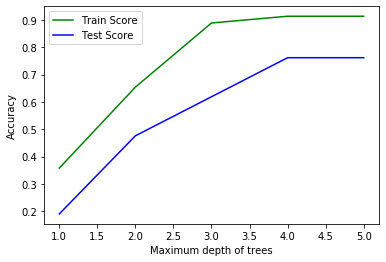

In [30]:
print("Training Accuracy:",clf_gini.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", clf_gini.score(X_test, y_test) )#Accuracy of the test.

train_score_array = []
test_score_array = []

for k in range (1, 6):
    clf = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=k, min_samples_leaf=5)  
    clf.fit(X_train, y_train)
    train_score_array.append(clf.score(X_train, y_train))
    test_score_array.append(clf.score(X_test, y_test))
x_axis = range(1,6) # x_axis values
%matplotlib inline
#x-values, y-values, Name for legend, color
plt.plot(x_axis, train_score_array , label = "Train Score", c= "g") #Plots a green line
plt.plot(x_axis, test_score_array, label = "Test Score", c= "b")  #Plots a blue line
plt.xlabel('Maximum depth of trees')
plt.ylabel('Accuracy')
plt.legend()

### Expected Outputs vs Predicted Outputs

In [31]:
y_pred = clf_gini.predict(X_test)

values = []
for i in zip(y_test, y_pred):
    values.append(list(i))
dataFrame = pd.DataFrame(values, columns = ["Expected", "Predicted"])
dataFrame

,Expected,Predicted
0,1,4
1,5,5
2,0,4
3,3,3
4,5,5
5,4,4
6,1,0
7,3,3
8,3,3
9,3,3


# Decision Trees - Entropy

### Train Decision Tree

In [32]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 5, min_samples_leaf = 5) 
# Performing training 
clf_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

### Accuracy

Training Accuracy: 0.9135802469135802
Testing Accuracy: 0.7619047619047619


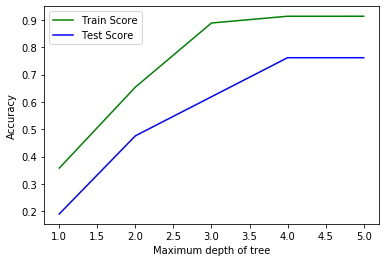

In [33]:
print("Training Accuracy:",clf_entropy.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", clf_entropy.score(X_test, y_test) )#Accuracy of the test.

train_score_array = []
test_score_array = []

for k in range (1, 6):
    clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = k, min_samples_leaf = 5) 
    clf.fit(X_train, y_train)
    train_score_array.append(clf.score(X_train, y_train))
    test_score_array.append(clf.score(X_test, y_test))
x_axis = range(1,6) # x_axis values
%matplotlib inline
#x-values, y-values, Name for legend, color
plt.plot(x_axis, train_score_array , label = "Train Score", c= "g") #Plots a green line
plt.plot(x_axis, test_score_array, label = "Test Score", c= "b")  #Plots a blue line
plt.xlabel('Maximum depth of tree')
plt.ylabel('Accuracy')
plt.legend()

### Expected Outputs vs Predicted Outputs

In [34]:
y_pred = clf_entropy.predict(X_test)

values = []

for i in zip(y_test, y_pred):
    values.append(list(i))
dataFrame = pd.DataFrame(values, columns = ["Expected", "Predicted"])
dataFrame

,Expected,Predicted
0,1,4
1,5,5
2,0,4
3,3,3
4,5,5
5,4,4
6,1,0
7,3,3
8,3,3
9,3,3


# Decision Tree - Grid Search Algorithm for best parameters

In [35]:
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'criterion': ['entropy', 'gini']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'criterion': ['entropy', 'gini']}


In [36]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 6, return_train_score = True)
grid_search.fit(X_train, y_train)

/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,

In [37]:
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Best score: 0.8395
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1}


In [38]:
bestdt = DecisionTreeClassifier(criterion = "entropy", random_state = 10, max_depth = 4, min_samples_leaf = 1) 
bestdt.fit(X_train, y_train)
print("Training Accuracy:",bestdt.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", bestdt.score(X_test, y_test) )#Accuracy of the test.
final_performances.append(bestdt.score(X_test,y_test))
final_algs.append("Decision Tree")

Training Accuracy: 0.9753086419753086
Testing Accuracy: 0.6666666666666666


# Logistic Regression

### Train Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Accuracy

In [40]:
print("Training Accuracy:",lr.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", lr.score(X_test, y_test) )#Accuracy of the test.

Training Accuracy: 0.8024691358024691
Testing Accuracy: 0.6666666666666666


## Grid Search Algorithm for Logistic Regression = max_iterations

In [41]:
param_grid = {'max_iter': [50, 100, 200, 500, 1000, 1500],'multi_class': ['ovr', 'auto']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_iter': [50, 100, 200, 500, 1000, 1500], 'multi_class': ['ovr', 'auto']}


In [42]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv = 6, return_train_score = True)
grid_search.fit(X_train, y_train)

/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_iter': [50, 100, 200, 500, 1000, 1500],
                         'multi_class': ['ovr', 'auto']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [43]:
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Best score: 0.7778
Best parameters: {'max_iter': 50, 'multi_class': 'ovr'}


In [44]:
lreg = LogisticRegression(max_iter = 50, multi_class = 'ovr') 
lreg.fit(X_train, y_train)

/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
print("Training Accuracy:",lreg.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", lreg.score(X_test, y_test) )#Accuracy of the test.
final_performances.append(lreg.score(X_test,y_test))
final_algs.append("Logistic Regression")

Training Accuracy: 0.8024691358024691
Testing Accuracy: 0.6666666666666666


### Expected Outputs vs Predicted Ouputs

In [46]:
y_pred = lr.predict(X_test)

values = []

for i in zip(y_test, y_pred):
    values.append(list(i))
dataFrame = pd.DataFrame(values, columns = ["Expected", "Predicted"])
dataFrame

,Expected,Predicted
0,1,4
1,5,5
2,0,4
3,3,3
4,5,5
5,4,4
6,1,4
7,3,3
8,3,3
9,3,3


# Naive Bayes 

### Train Naive Bayes Classifier

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Accuracy

In [48]:
print("Training Accuracy:", gnb.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", gnb.score(X_test, y_test) )#Accuracy of the test.
final_performances.append(gnb.score(X_test,y_test))
final_algs.append("Naive Bayes")

Training Accuracy: 0.9506172839506173
Testing Accuracy: 0.7619047619047619


### Expected Outputs vs Predicted Outputs

In [49]:
y_pred = gnb.predict(X_test)

values = []

for i in zip(y_test, y_pred):
    values.append(list(i))
dataFrame = pd.DataFrame(values, columns = ["Expected", "Predicted"])
dataFrame

,Expected,Predicted
0,1,4
1,5,5
2,0,0
3,3,3
4,5,5
5,4,4
6,1,0
7,3,3
8,3,3
9,3,3



# Neural Network using Mult-Layer Perceptron Classifier

In [50]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(4,32,32), 
                    max_iter=10000, 
                    activation='tanh', 
                    verbose=False)
mlp.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 32, 32), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[3 1 0 0 0 0]
 [0 4 0 0 1 0]
 [0 0 2 0 0 0]
 [0 1 0 4 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 3]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.67      0.80      0.73         5
           2       1.00      1.00      1.00         2
           3       1.00      0.80      0.89         5
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         3

    accuracy                           0.86        21
   macro avg       0.89      0.89      0.88        21
weighted avg       0.89      0.86      0.86        21



In [52]:
param_grid = {'hidden_layer_sizes': [(4,16,16), (8,16,16), (16,16,16), (4,32,32), (8,32,32), (16,32,32), (32,32,32)]
              ,'activation': ['relu', 'tanh', 'logistic'], 'max_iter': [10000]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(MLPClassifier(), param_grid, cv = 6, return_train_score = True)
grid_search.fit(X_train, y_train)

print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Parameter grid:
{'hidden_layer_sizes': [(4, 16, 16), (8, 16, 16), (16, 16, 16), (4, 32, 32), (8, 32, 32), (16, 32, 32), (32, 32, 32)], 'activation': ['relu', 'tanh', 'logistic'], 'max_iter': [10000]}


/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.9383
Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (4, 16, 16), 'max_iter': 10000}


In [53]:
mlp = MLPClassifier(hidden_layer_sizes=(4,32,32), 
                    max_iter=10000, 
                    activation='tanh', 
                    verbose=False)
mlp.fit(X_train,y_train)

print("Training Accuracy:",mlp.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", mlp.score(X_test, y_test) )#Accuracy of the test.
final_performances.append(mlp.score(X_test,y_test))
final_algs.append("MLP")



Training Accuracy: 1.0
Testing Accuracy: 0.8095238095238095



# Ensemble Methods

## Random Forests

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, random_state = 42)
rf.fit(X_train, y_train); #n_estimators is the number of decision trees being used.

### Accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.8095238095238095


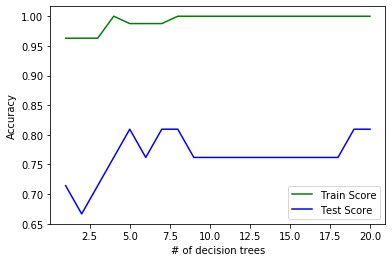

In [55]:
print("Training Accuracy:",rf.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", rf.score(X_test, y_test) )#Accuracy of the test.

train_score_array = []
test_score_array = []

for k in range (1, 21):
    rf = RandomForestClassifier(n_estimators = k, random_state = 42)
    rf.fit(X_train, y_train)
    train_score_array.append(rf.score(X_train, y_train))
    test_score_array.append(rf.score(X_test, y_test))
x_axis = range(1,21) # x_axis values
%matplotlib inline
#x-values, y-values, Name for legend, color
plt.plot(x_axis, train_score_array , label = "Train Score", c= "g") #Plots a green line
plt.plot(x_axis, test_score_array, label = "Test Score", c= "b")  #Plots a blue line
plt.xlabel('# of decision trees')
plt.ylabel('Accuracy')
plt.legend()

## Grid Search Algorithm for best Random Forest parameters.

In [56]:
param_grid = {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              'random_state':[42]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'random_state': [42]}


In [57]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv = 6, return_train_score = True)
grid_search.fit(X_train, y_train)

/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [58]:
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Best score: 0.9012
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 15, 'random_state': 42}


In [59]:
rf = RandomForestClassifier(n_estimators = 35, random_state = 42, max_depth = 5, min_samples_leaf = 1) 
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=35,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [60]:
print("Training Accuracy:",rf.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", rf.score(X_test, y_test) )#Accuracy of the test.
final_performances.append(rf.score(X_test,y_test))
final_algs.append("Random Forest")



Training Accuracy: 1.0
Testing Accuracy: 0.8095238095238095


### Expected Outputs vs Predicted Outputs

In [61]:
y_pred = rf.predict(X_test)

values = []

for i in zip(y_test, y_pred):
    values.append(list(i))
dataFrame = pd.DataFrame(values, columns = ["Expected", "Predicted"])
dataFrame

,Expected,Predicted
0,1,4
1,5,5
2,0,4
3,3,3
4,5,5
5,4,4
6,1,1
7,3,3
8,3,3
9,3,3


## Voting Classifier

In [65]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('dt', bestdt), ('lr', lr), ('knn', knn), ('svc', svclassifier), ('gnb', gnb), ('mlp', mlp)], voting='hard')
vc.fit(X_train, y_train)

print("Training Accuracy:",vc.score(X_train, y_train)) # Accuracy of the model when training.
print("Testing Accuracy:", vc.score(X_test, y_test) ) # Accuracy of the test.
final_performances.append(vc.score(X_test,y_test))
final_algs.append("Voting")

/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/snell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Accuracy: 1.0
Testing Accuracy: 0.9047619047619048


## Bagging

In [66]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator = bestdt, n_estimators=500)
clf.fit(X_train, y_train)

print("Training Accuracy:",clf.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", clf.score(X_test, y_test) )#Accuracy of the test.
final_performances.append(clf.score(X_test,y_test))
final_algs.append("Bagging")

Training Accuracy: 0.9876543209876543
Testing Accuracy: 0.8095238095238095


## Boosting

In [67]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(base_estimator = bestdt, n_estimators=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("Training Accuracy:",clf.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", clf.score(X_test, y_test) )#Accuracy of the test.
final_performances.append(clf.score(X_test,y_test))
final_algs.append("AdaBoost")

Training Accuracy: 1.0
Testing Accuracy: 0.8571428571428571


In [68]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("Training Accuracy:",clf.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", clf.score(X_test, y_test) )#Accuracy of the test.
final_performances.append(clf.score(X_test,y_test))
final_algs.append("GradientBoost")

Training Accuracy: 1.0
Testing Accuracy: 0.8571428571428571


## LightGBM

In [69]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train, feature_name = features)
params = {
   'task': 'train',
   'boosting_type': 'gbdt',
   'max_depth': 5,
   'objective': 'multiclass',
   'num_class': 6,
   'metric': 'multi_logloss', 
   'min_data': 1,
   'verbose': -1
}
 
gbm = lgb.train(params, lgb_train, num_boost_round=100)
y_pred = gbm.predict(X_test)

predictions = []
for i in y_pred:
    predictions.append(np.argmax(i))

values = []

for i in zip(y_test, predictions):
    values.append(list(i))
dataFrame = pd.DataFrame(values, columns = ["Expected", "Predicted"])
dataFrame

/Users/snell/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


,Expected,Predicted
0,1,4
1,5,5
2,0,1
3,3,3
4,5,5
5,4,4
6,1,1
7,3,3
8,3,3
9,3,3


In [70]:
from sklearn.metrics import accuracy_score

y_pred = gbm.predict(X_test)
test_predictions = [np.argmax(value) for value in y_pred]
    
y_pred = gbm.predict(X_train)
train_predictions = [np.argmax(value) for value in y_pred]

print("Training Accuracy:",accuracy_score(train_predictions, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", accuracy_score(test_predictions, y_test)) # Accuracy of the test.
final_performances.append(accuracy_score(test_predictions,y_test))
final_algs.append("LightGBM")

Training Accuracy: 1.0
Testing Accuracy: 0.8095238095238095


#### Note: According to documentation, doesn't work really well for small datasets

### Feature Importance

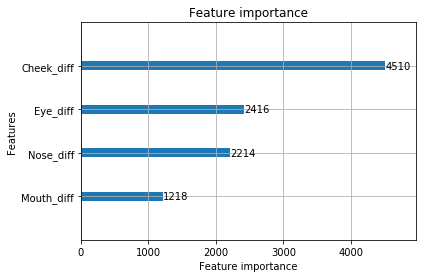

In [71]:
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

## XGBoost

In [72]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
test_predictions = [round(value) for value in y_pred]
    
y_pred = xgb.predict(X_train)
train_predictions = [round(value) for value in y_pred]

print("Training Accuracy:",accuracy_score(train_predictions, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", accuracy_score(test_predictions, y_test)) # Accuracy of the test.
final_performances.append(accuracy_score(test_predictions,y_test))
final_algs.append("XGBoost")

Training Accuracy: 1.0
Testing Accuracy: 0.9047619047619048


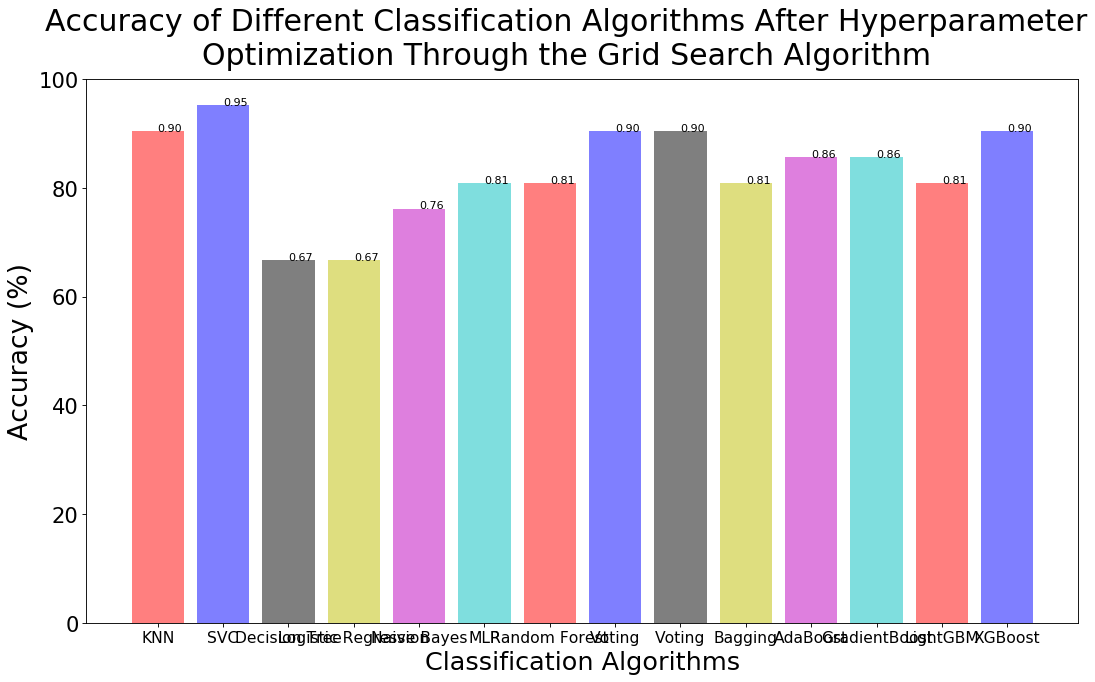

In [73]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

fig = figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

y_pos = np.arange(len(final_algs))
plt.xticks(range(len(final_algs)), final_algs, fontsize=14)
plt.yticks([0,0.2,0.40,0.60,0.80,1.00], (0,20,40,60,80,100), fontsize=19)
colors =['r','b','k','y','m','c']
    
plt.rcParams['xtick.labelsize'] = 20 
barlist = plt.bar(y_pos, final_performances, color=colors, align='center', alpha=0.5)

plt.ylabel('Accuracy (%)', size = 24)
#plt.title('\n \nThe accuracy of different classification algorithms on the dataset of facial features after optimization\n of their hyperparameters through the Grid Search Algorithm.')
plt.xlabel("Classification Algorithms", size = 23)
plt.suptitle('Accuracy of Different Classification Algorithms After Hyperparameter\nOptimization Through the Grid Search Algorithm', size = 27)
A = range(len(final_performances))
for xy in zip(A, final_performances):                                     
    plt.annotate('%0.2f' % xy[1], xy = xy, textcoords='data') 
         
plt.show()
